# PSM on GI Bleed Cohort

## Imports

In [628]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd

## Functions

In [629]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)

## Data Prep

In [630]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/albumin_cleaned_for_psm_sg1.csv')

In [631]:
df.shape

(11880, 15)

In [632]:
df.albumin_24hrs.value_counts()

0.0    11301
1.0      579
Name: albumin_24hrs, dtype: int64

In [633]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [634]:
df.head()

personid                           encounterid  \
0  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
1  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   
2  ae8cb105-b09f-4fa1-abf1-4391402aec50  2754019c-51a9-4f0f-893d-1226cc9f1262   
3  f146fbdc-3096-4c16-aa7e-c8d0ebd287af  b0f368bf-76f8-408d-8c77-eac278094f87   
4  2b6e3c13-d1fa-4095-8cc3-875bbf0d6abe  e4b75e71-266a-4ec1-872f-c6e053b31cb3   

   albumin_24hrs  Cirrhosis  anemia_status  30_day_mortality  ICU  \
0            1.0          0            3.0                 0    0   
1            0.0          0            3.0                 0    0   
2            0.0          0            3.0                 0    0   
3            1.0          0            3.0                 0    0   
4            0.0          0            3.0                 0    1   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               2.9      1   
2                 0                   1    5               2.5      0   
3                 0                   0    1               3.3      1   
4                 0                   1    1               2.7      0   

   beta_blocker  hemorrhagic  SAPS  
0             0            0    17  
1             0            0    12  
2             0            1    33  
3             0            0    17  
4             0            0    22

In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   personid            11880 non-null  object 
 1   encounterid         11880 non-null  object 
 2   albumin_24hrs       11880 non-null  float64
 3   Cirrhosis           11880 non-null  int64  
 4   anemia_status       11880 non-null  float64
 5   30_day_mortality    11880 non-null  int64  
 6   ICU                 11880 non-null  int64  
 7   mass_transfusion    11880 non-null  int64  
 8   total_transfusions  11880 non-null  int64  
 9   CCI                 11880 non-null  int64  
 10  bl_albumin_value    11880 non-null  float64
 11  qSOFA               11880 non-null  int64  
 12  beta_blocker        11880 non-null  int64  
 13  hemorrhagic         11880 non-null  int64  
 14  SAPS                11880 non-null  int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 1.4

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [636]:
am = df[df['albumin_24hrs'] == 1]['30_day_mortality'].value_counts()
print(am)

0    514
1     65
Name: 30_day_mortality, dtype: int64


In [637]:
mrate(am)

30 Day Mortality Rate (pct): 11.226252158894647


In [638]:
nam = df[df['albumin_24hrs'] == 0]['30_day_mortality'].value_counts()
print(nam)

0    10669
1      632
Name: 30_day_mortality, dtype: int64


In [639]:
mrate(nam)

30 Day Mortality Rate (pct): 5.592425449075303


In [640]:
df_a24 = df[['personid', 'encounterid', '30_day_mortality']]

In [641]:
df_a24.head()

personid                           encounterid  \
0  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
1  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   
2  ae8cb105-b09f-4fa1-abf1-4391402aec50  2754019c-51a9-4f0f-893d-1226cc9f1262   
3  f146fbdc-3096-4c16-aa7e-c8d0ebd287af  b0f368bf-76f8-408d-8c77-eac278094f87   
4  2b6e3c13-d1fa-4095-8cc3-875bbf0d6abe  e4b75e71-266a-4ec1-872f-c6e053b31cb3   

   30_day_mortality  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [642]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [643]:
df.shape

(11880, 15)

In [644]:
df.head()

personid                           encounterid  \
0  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
1  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   
2  ae8cb105-b09f-4fa1-abf1-4391402aec50  2754019c-51a9-4f0f-893d-1226cc9f1262   
3  f146fbdc-3096-4c16-aa7e-c8d0ebd287af  b0f368bf-76f8-408d-8c77-eac278094f87   
4  2b6e3c13-d1fa-4095-8cc3-875bbf0d6abe  e4b75e71-266a-4ec1-872f-c6e053b31cb3   

   albumin_24hrs  Cirrhosis  anemia_status  30_day_mortality  ICU  \
0            1.0          0            3.0                 0    0   
1            0.0          0            3.0                 0    0   
2            0.0          0            3.0                 0    0   
3            1.0          0            3.0                 0    0   
4            0.0          0            3.0                 0    1   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               2.9      1   
2                 0                   1    5               2.5      0   
3                 0                   0    1               3.3      1   
4                 0                   1    1               2.7      0   

   beta_blocker  hemorrhagic  SAPS  
0             0            0    17  
1             0            0    12  
2             0            1    33  
3             0            0    17  
4             0            0    22

## Initialize PsmPy Class

In [645]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['personid', '30_day_mortality'])

In [646]:
%%time
psm.logistic_ps(balance = True)

Wall time: 2.27 s


In [647]:
df_psm = psm.predicted_data

In [648]:
df_psm.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
1  b0f368bf-76f8-408d-8c77-eac278094f87          0            3.0    0   
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a          0            3.0    0   
3  09821c9f-88a1-42ba-a6bf-9648290d4187          0            3.0    1   
4  97bd85d7-e40e-444f-8163-3ef89ee442f1          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               3.3      1   
2                 0                   1    8               3.2      1   
3                 0                   1    8               2.7      0   
4                 0                   0    2               1.4      1   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             0            0    17          0.322485         -0.742376   
1             0            0    17          0.257823         -1.057312   
2             0            0    19          0.438194         -0.248493   
3             0            0    24          0.591100          0.368513   
4             0            0    36          0.668499          0.701405   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

## Plot the propensity score / propensity logits

In [649]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 35.4 s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


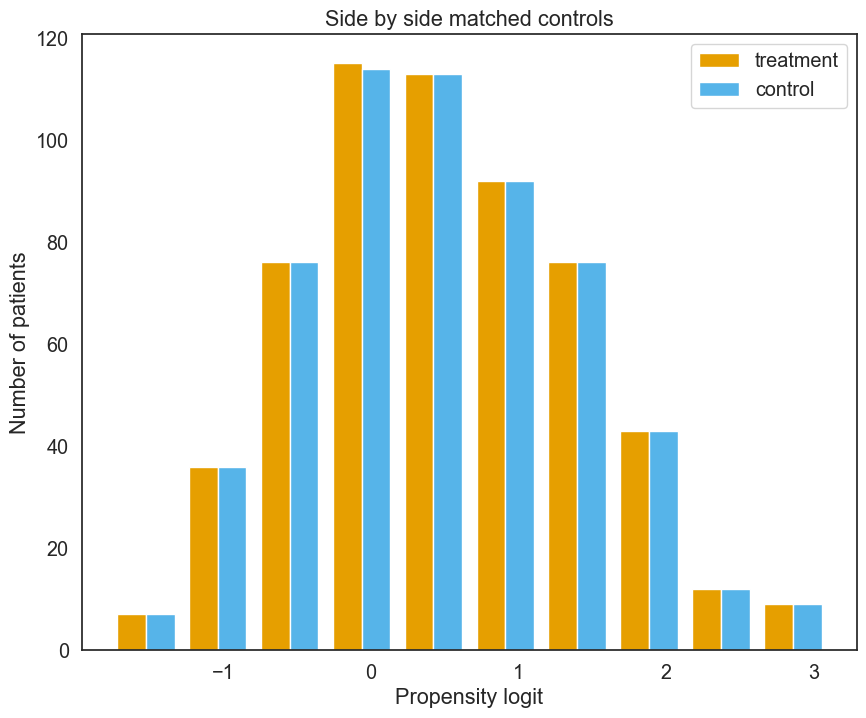

In [650]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

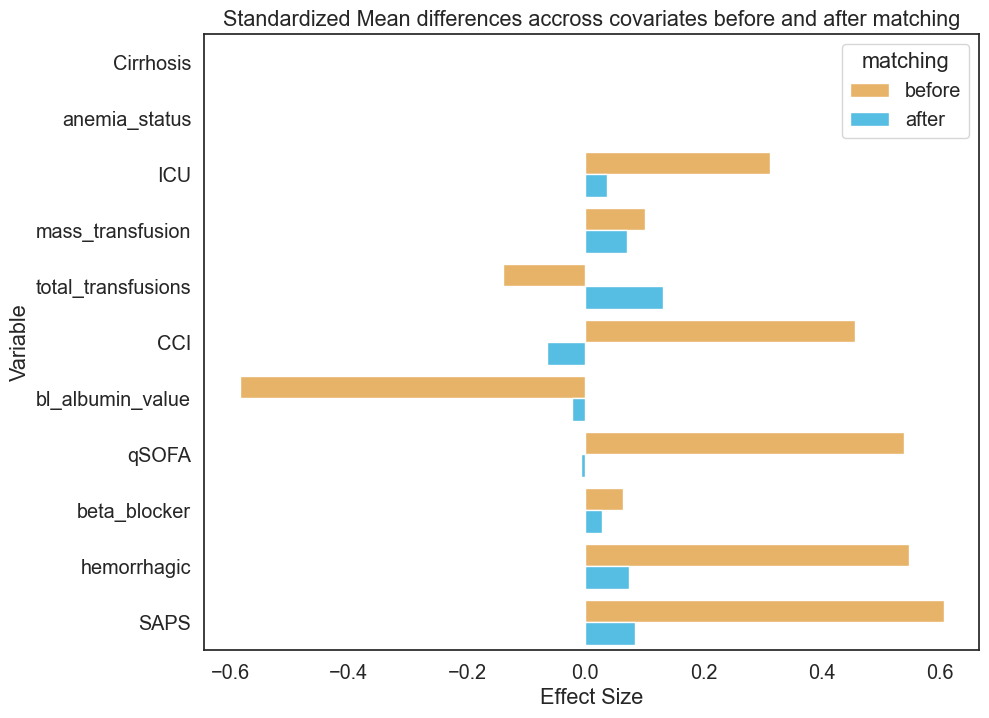

In [651]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [652]:
matched_df = psm.df_matched

In [653]:
matched_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
1  b0f368bf-76f8-408d-8c77-eac278094f87          0            3.0    0   
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a          0            3.0    0   
3  09821c9f-88a1-42ba-a6bf-9648290d4187          0            3.0    1   
4  97bd85d7-e40e-444f-8163-3ef89ee442f1          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               3.3      1   
2                 0                   1    8               3.2      1   
3                 0                   1    8               2.7      0   
4                 0                   0    2               1.4      1   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             0            0    17          0.322485         -0.742376   
1             0            0    17          0.257823         -1.057312   
2             0            0    19          0.438194         -0.248493   
3             0            0    24          0.591100          0.368513   
4             0            0    36          0.668499          0.701405   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

In [654]:
matched_df.shape

(1157, 15)

## Matched Ids

In [655]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519  e062993d-13de-4526-8b1d-4d3554b26f4e
1  b0f368bf-76f8-408d-8c77-eac278094f87  2da6f3bc-a66c-470b-8b13-a755e8d49106
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a  14f9f14f-488c-405a-8ec8-576a35baad02
3  09821c9f-88a1-42ba-a6bf-9648290d4187  b0631470-76e2-4faa-8982-0488811e608c
4  97bd85d7-e40e-444f-8163-3ef89ee442f1  4fd374da-0f4b-4c01-a5f7-740732b5f595

## Effect sizes per variables

In [656]:
psm.effect_size

Variable matching  Effect Size
0            Cirrhosis   before     0.000000
1            Cirrhosis    after     0.000000
2        anemia_status   before     0.000000
3        anemia_status    after     0.000000
4                  ICU   before     0.311872
5                  ICU    after     0.036468
6     mass_transfusion   before     0.100194
7     mass_transfusion    after     0.070325
8   total_transfusions   before    -0.139308
9   total_transfusions    after     0.130945
10                 CCI   before     0.455678
11                 CCI    after    -0.064791
12    bl_albumin_value   before    -0.584379
13    bl_albumin_value    after    -0.022142
14               qSOFA   before     0.538189
15               qSOFA    after    -0.007867
16        beta_blocker   before     0.064197
17        beta_blocker    after     0.028539
18         hemorrhagic   before     0.547195
19         hemorrhagic    after     0.073130
20                SAPS   before     0.606524
21                SAPS    after     0.084626

## Explore Matched df

In [657]:
matched_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
1  b0f368bf-76f8-408d-8c77-eac278094f87          0            3.0    0   
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a          0            3.0    0   
3  09821c9f-88a1-42ba-a6bf-9648290d4187          0            3.0    1   
4  97bd85d7-e40e-444f-8163-3ef89ee442f1          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               3.3      1   
2                 0                   1    8               3.2      1   
3                 0                   1    8               2.7      0   
4                 0                   0    2               1.4      1   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             0            0    17          0.322485         -0.742376   
1             0            0    17          0.257823         -1.057312   
2             0            0    19          0.438194         -0.248493   
3             0            0    24          0.591100          0.368513   
4             0            0    36          0.668499          0.701405   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

In [658]:
matched_df.albumin_24hrs.value_counts()

1    579
0    578
Name: albumin_24hrs, dtype: int64

In [659]:
matched_df.shape

(1157, 15)

## Join Matched df with earlier df on encounterid to add outcome variables

In [660]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [661]:
f_df.shape

(1157, 17)

In [662]:
f_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
1  b0f368bf-76f8-408d-8c77-eac278094f87          0            3.0    0   
2  ff6c735a-74d5-42c1-9f09-6ec2b96d664a          0            3.0    0   
3  09821c9f-88a1-42ba-a6bf-9648290d4187          0            3.0    1   
4  97bd85d7-e40e-444f-8163-3ef89ee442f1          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    4               3.0      1   
1                 0                   0    1               3.3      1   
2                 0                   1    8               3.2      1   
3                 0                   1    8               2.7      0   
4                 0                   0    2               1.4      1   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             0            0    17          0.322485         -0.742376   
1             0            0    17          0.257823         -1.057312   
2             0            0    19          0.438194         -0.248493   
3             0            0    24          0.591100          0.368513   
4             0            0    36          0.668499          0.701405   

   albumin_24hrs                              personid  30_day_mortality  
0              1  561afc23-43fa-4108-8d23-01cd03d0001f                 0  
1              1  f146fbdc-3096-4c16-aa7e-c8d0ebd287af                 0  
2              1  561afc23-43fa-4108-8d23-01cd03d0001f                 0  
3              1  614252bd-c484-444c-8ed7-048ba727b3fb                 0  
4              1  8b965468-6371-47a8-9819-6cfadb988043                 1

In [663]:
df = f_df

In [664]:
am = df[df['albumin_24hrs'] == 1]['30_day_mortality'].value_counts()
print(am)

0    514
1     65
Name: 30_day_mortality, dtype: int64


In [665]:
mrate(am)

30 Day Mortality Rate (pct): 11.226252158894647


In [666]:
nam = df[df['albumin_24hrs'] == 0]['30_day_mortality'].value_counts()
print(nam)

0    514
1     64
Name: 30_day_mortality, dtype: int64


In [667]:
mrate(nam)

30 Day Mortality Rate (pct): 11.072664359861593


In [668]:
s_group1 = df.loc[(df['albumin_24hrs'] > 0.5)]

In [669]:
msg1 = s_group1['30_day_mortality'].value_counts()

In [670]:
mrate(msg1)

30 Day Mortality Rate (pct): 11.226252158894647


In [671]:
s_group1_control = df.loc[(df['albumin_24hrs'] < 0.5)]

In [672]:
mctl1 = s_group1_control['30_day_mortality'].value_counts()

In [673]:
mrate(mctl1)

30 Day Mortality Rate (pct): 11.072664359861593


In [674]:
s_group1_df = pd.concat([s_group1, s_group1_control])

In [675]:
s_group1_df.shape

(1157, 17)

In [676]:
contigency= pd.crosstab(s_group1_df['albumin_24hrs'], s_group1_df['30_day_mortality'])
contigency

30_day_mortality    0   1
albumin_24hrs            
0                 514  64
1                 514  65

In [677]:
from scipy.stats import chi2_contingency

#Chi-square test of independence with Yates correction
c, p, dof, expected = chi2_contingency(contigency)

print("p_value: ", p)
print("p_value: ",round(p,3))

p_value:  1.0
p_value:  1.0


In [678]:
#Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency, correction=False)

print("p_value: ", p)
print("p_value: ",round(p,3))

p_value:  0.933858059642204
p_value:  0.934


In [679]:
# f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/blood_diseases_matched_alb_24h_full.csv', index=False)